In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


Using Box-mueller to get points on a sphere
https://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/

In [2]:
def vec_from_uniform(n:int, m:int) -> np.array:
    '''
    n -- dimension
    m -- number od vecs
    '''
    vecs = np.random.normal(0, 1, (m, n))
    dv = (vecs**2).sum(axis=1) 
    vecs = vecs.transpose()/np.sqrt(dv)
    return vecs.transpose()


In [3]:
vecs_2d=vec_from_uniform(2, 1500)

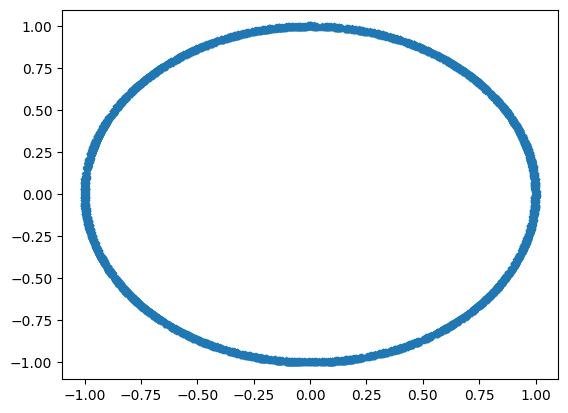

In [6]:
plt.plot(vecs_2d[:,0], vecs_2d[:,1], 'p')

In [4]:
def cos_hist(vec_list:np.array)->np.array:
    '''
    Histogram of cosine similarity == projections on first axis
    '''
    coss=vec_list[:,0]
    avg = np.average(coss)
    std = np.std(coss)
    return np.histogram(coss), avg, std

def l2_hist(vec_list:np.array)->np.array:
    '''
    Hiist of L2 norm
    '''
    coss=vec_list[:,0]
    val=np.sqrt(2*(1-coss))
    avg = np.average(val)
    std = np.std(val)
    return np.histogram(val), avg, std

In [5]:
def plot_hist(hist, bins):
    # Calculate the bin width
    bin_width = bins[1] - bins[0]

    norm=np.diff(bins).dot(hist)
    # Compute the PDF
    pdf = hist / norm
    # Plot the PDF
    plt.bar(bins[:-1], pdf, width=bin_width, alpha=0.5, label='PDF')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Probability Density Function')
    plt.legend()
    plt.show()

In [6]:
(bins, hist), avg, std = cos_hist(vecs_2d)

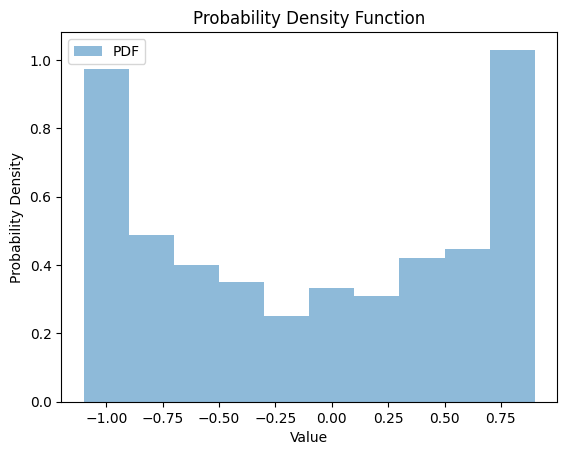

In [55]:
plot_hist(bins, hist)

In [7]:
avgs_cos, stds_cos, hists_cos = ([],[], [])
avgs_l2, stds_l2, hists_l2 = ([],[], [])
test=0
SAMPLE_SIZE=1500
dims=list(range(2, 4000, 50))
hist_dims=[]
for dim in dims:
    vecs = vec_from_uniform(dim, SAMPLE_SIZE)
    if (dim-2)%20==0:
        hist, avg, std = cos_hist(vecs)
        hists_cos.append(hist)
        avgs_cos.append(avg)
        stds_cos.append(std)
        hist, avg, std = l2_hist(vecs)
        hists_l2.append(hist)
        avgs_l2.append(avg)
        stds_l2.append(std)
        hist_dims.append(dim)
    else:
        coss=vecs[:,0]
        l2=np.sqrt(2*(1-coss))
        avgs_cos.append(np.average(coss))
        stds_cos.append(np.std(coss))
        avgs_l2.append(np.average(l2))
        stds_l2.append(np.std(l2))    



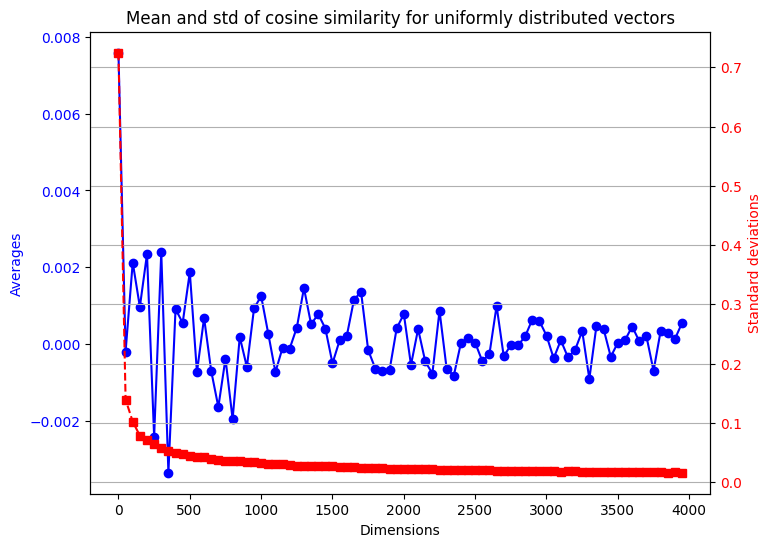

In [8]:
# Create a plot with a shared x-axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first set of data on the left y-axis
ax1.plot(dims, avgs_cos, label='Averages', color='b', marker='o', linestyle='-')
ax1.set_xlabel('Dimensions')
ax1.set_ylabel('Averages', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis
ax2.plot(dims, stds_cos, label='Standard deviations', color='r', marker='s', linestyle='--')
ax2.set_ylabel('Standard deviations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
#plt.legend(lines, labels, loc='upper left')
# Add labels, title, and legend
plt.title('Mean and std of cosine similarity for uniformly distributed vectors')
#plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.show()

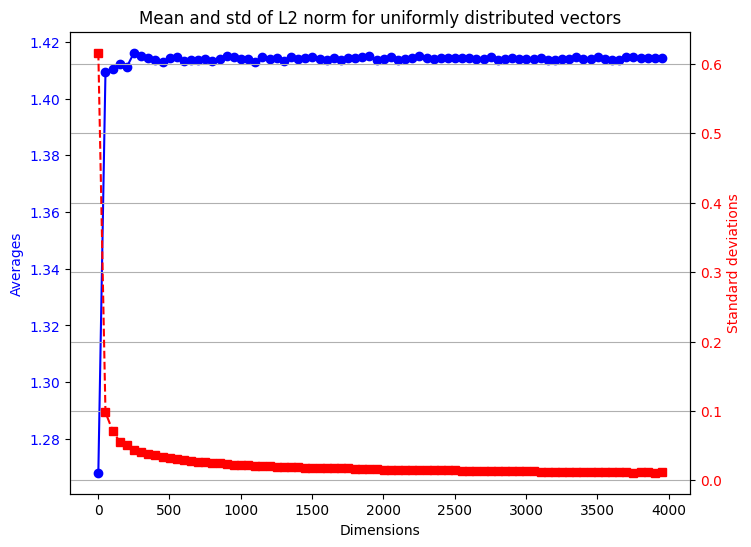

In [31]:
# Create a plot with a shared x-axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first set of data on the left y-axis
ax1.plot(dims, avgs_l2, label='Averages', color='b', marker='o', linestyle='-')
ax1.set_xlabel('Dimensions')
ax1.set_ylabel('Averages', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis
ax2.plot(dims, stds_l2, label='Standard deviations', color='r', marker='s', linestyle='--')
ax2.set_ylabel('Standard deviations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
#plt.legend(lines, labels, loc='upper left')
# Add labels, title, and legend
plt.title('Mean and std of L2 norm for uniformly distributed vectors')
#plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.show()

In [62]:
len(hists_l2)

40

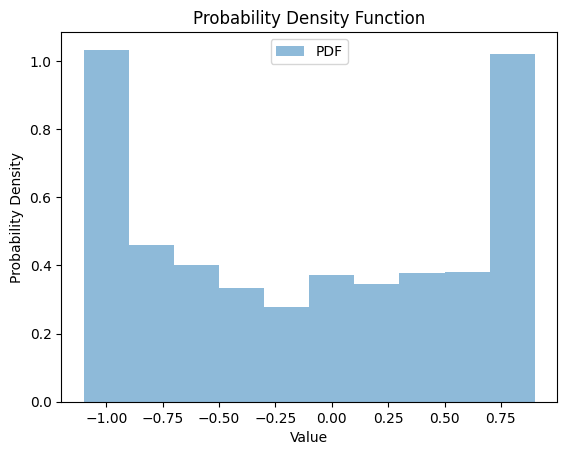

In [17]:
plot_hist(hists[0][0],hists[0][1])

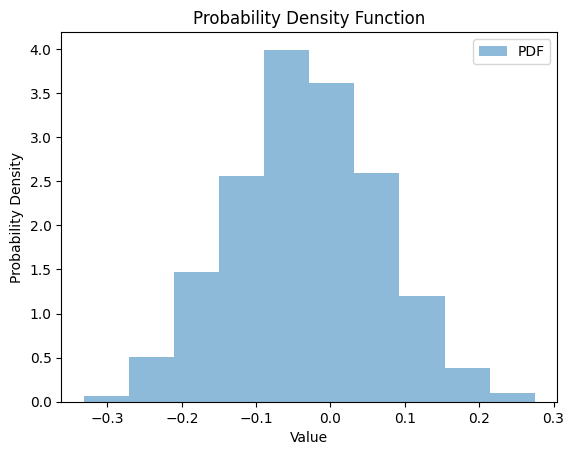

In [18]:
plot_hist(hists[1][0],hists[1][1])

In [54]:
def normalize_hist(hist, bins):
    dx=np.diff(bins)
    #normalize hist
    nhist=hist/np.dot(hist, dx)
    return nhist
def hist_mean_std(hist, bin_edges):

    mids=(bin_edges[:-1]+bin_edges[1:])/2.
    dx=np.diff(bin_edges)
    #normalize hist
    nhist=hist/np.dot(hist, dx)
    #means
    mean = np.dot(mids*nhist, dx)
    #std
    std = np.dot((mids**2)*nhist, dx)-mean**2
    return mean, std

def plot_histograms(hists, dims, general_title):
    num_histograms = len(hists)
    num_rows = (num_histograms + 1) // 2  # Calculate the number of rows needed for subplots

    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

    # Flatten the axs array if there's only one row
    if num_rows == 1:
        axs = axs.reshape(1, 2)

    for i in range(num_histograms):
        hist, bin_edges = hists[i]
        ax = axs[i // 2, i % 2]  # Get the appropriate subplot

        # Normalize the histogram
        nhist = normalize_hist(hist, bin_edges)

        # Plot the histogram
        ax.hist(bin_edges[:-1], bin_edges, weights=nhist, alpha=0.7)
        ax.set_title(dims[i])
        ax.set_xlabel('Value')
        ax.set_ylabel('Normalized Frequency')

        # Calculate mean and standard deviation
        mean, std_dev = hist_mean_std(hist, bin_edges)
        # Format mean and standard deviation in scientific notation
        mean_sci = "{:.2e}".format(mean)
        std_dev_sci = "{:.2e}".format(std_dev)
        # Add annotations
        ax.annotate(f'Mean: {mean_sci}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
        ax.annotate(f'Std Dev: {std_dev_sci}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)

    # Remove any empty subplots
    if num_histograms % 2 != 0:
        axs[-1, -1].axis('off')

    plt.suptitle(general_title)  # Add a general title to the entire figure
    plt.tight_layout()
    plt.show()


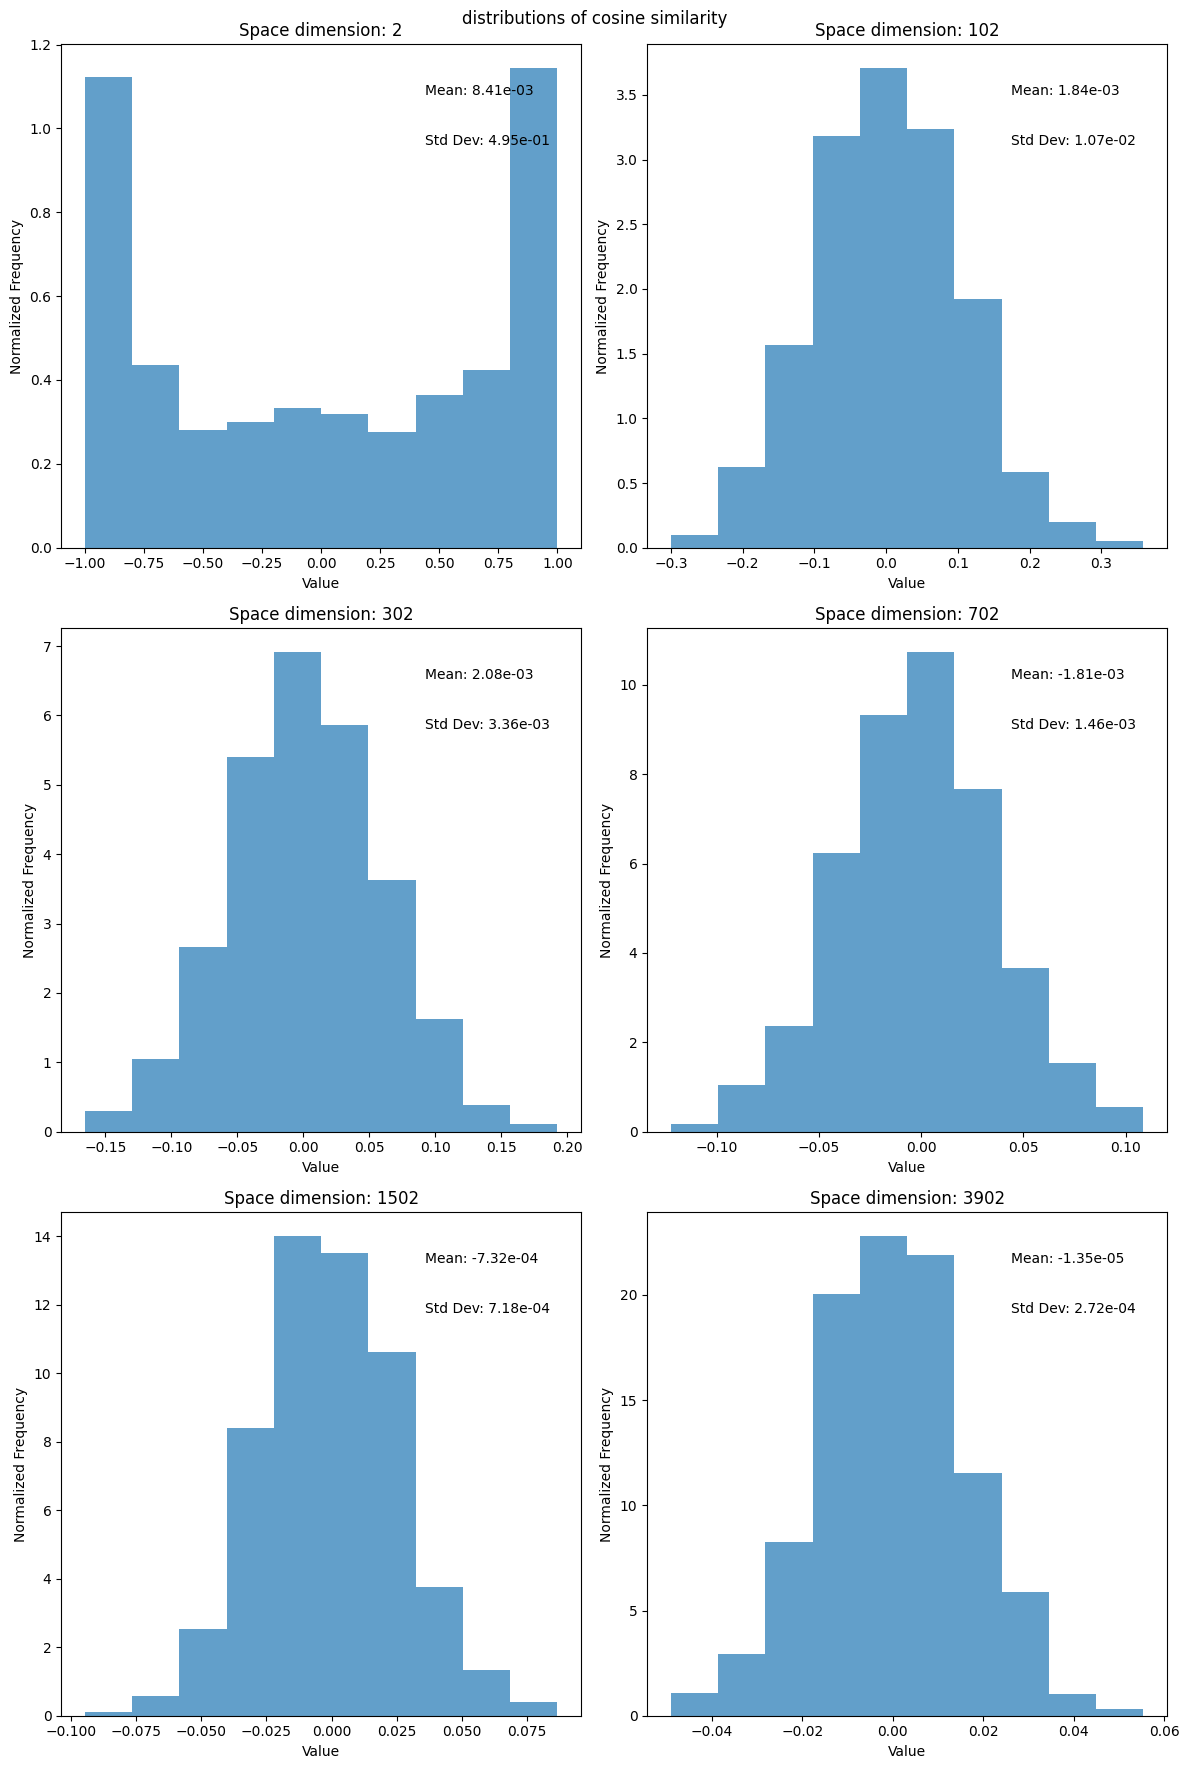

In [60]:
indices=[0, 1, 3, 7, 15, 39]
selected_cos=[hists_cos[i] for i in indices]
selected_dims=[f"Space dimension: {hist_dims[i]}" for i in indices]
plot_histograms(selected_cos, selected_dims, "distributions of cosine similarity")

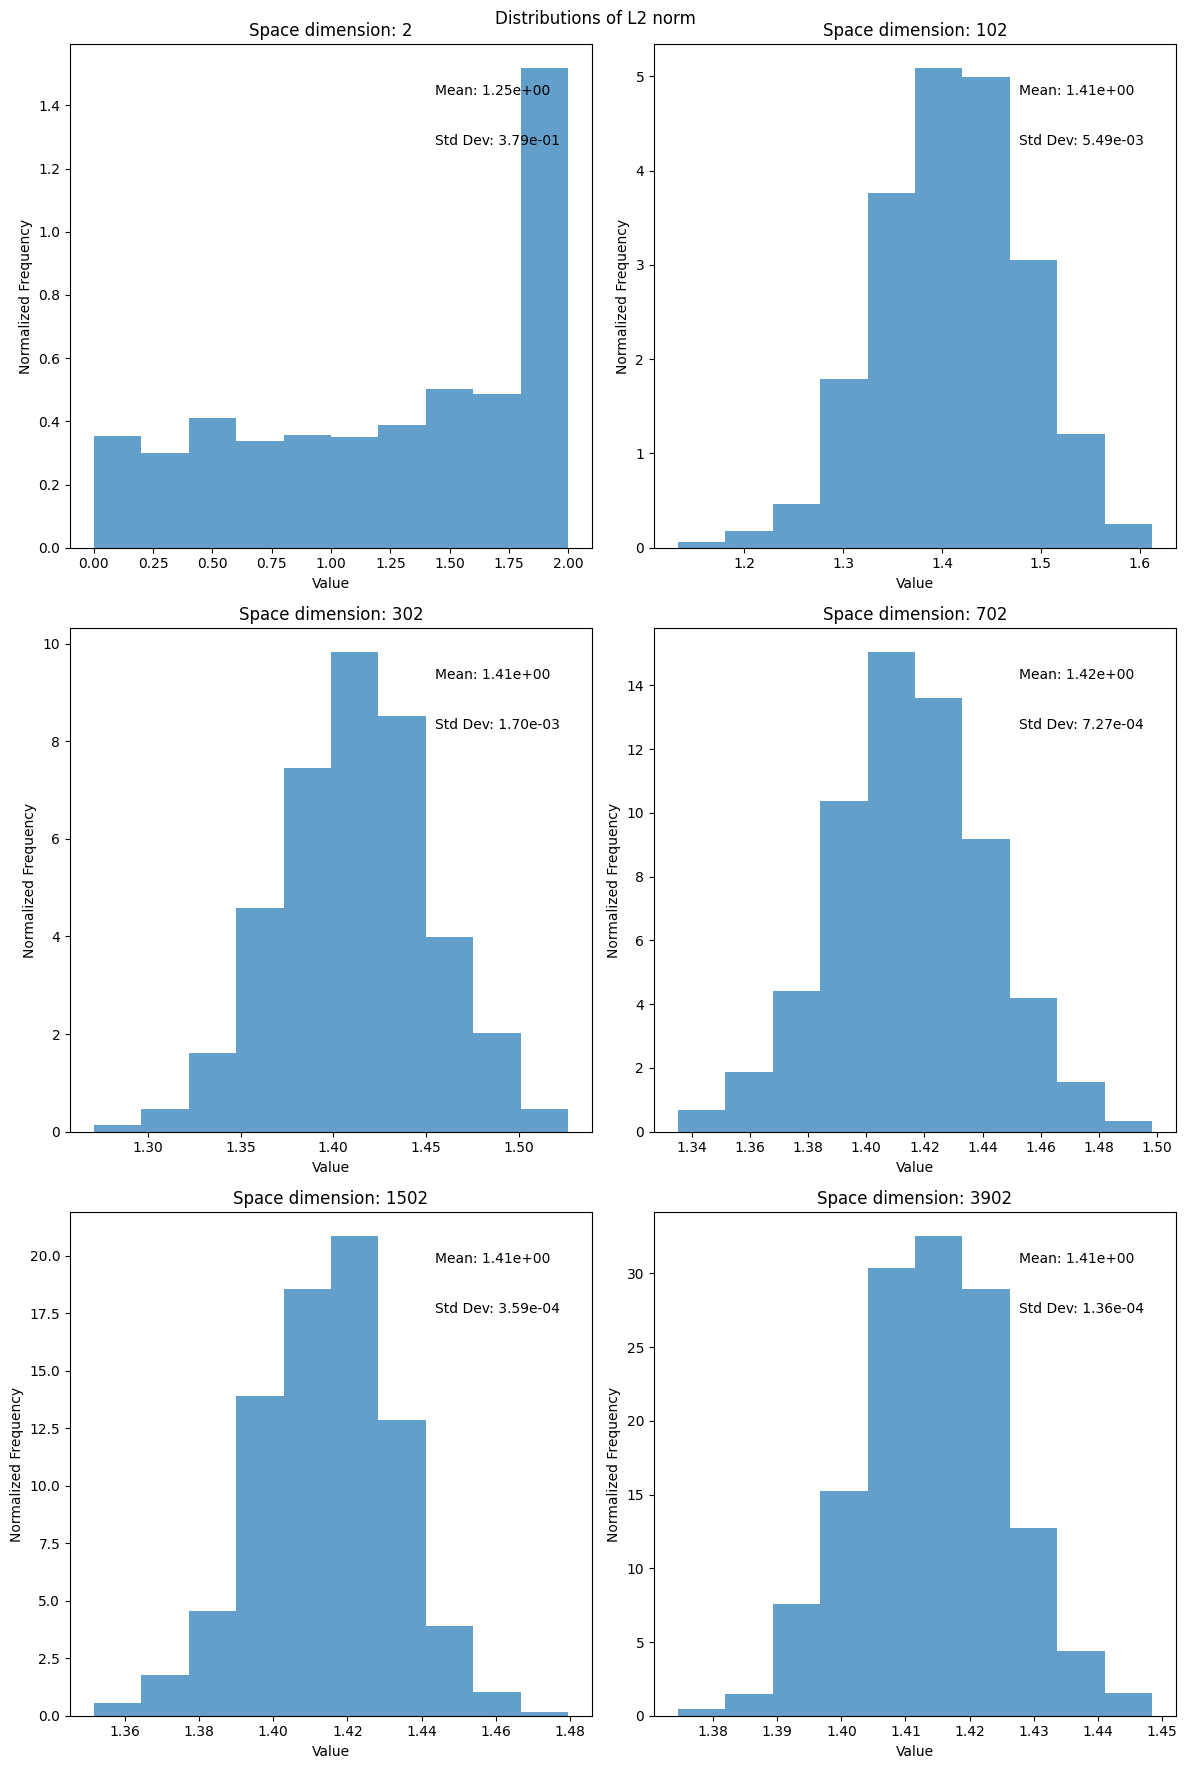

In [65]:
indices=[0, 1, 3, 7, 15, 39]
selected_l2=[hists_l2[i] for i in indices]
selected_dims=[f"Space dimension: {hist_dims[i]}" for i in indices]
plot_histograms(selected_l2, selected_dims, "Distributions of L2 norm")

In [64]:
selected_l2

['Space dimension: 2',
 'Space dimension: 102',
 'Space dimension: 302',
 'Space dimension: 702',
 'Space dimension: 1502',
 'Space dimension: 3902']